<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/Asian_options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

## Asian Option Payoff(Monte Carlo)

In [5]:
def asian_option(S_o, K, T, r, sigma, N, M):
  dt = T / N
  u = np.exp(sigma * np.sqrt(dt))
  d = np.exp(-sigma * np.sqrt(dt))
  p = (np.exp(r * dt) - d) / (u - d)
  Asian = np.zeros([M])
  S = np.zeros([M, N + 1])
  S[:, 0] = S_o

  for j in range(0, M):
    random = np.random.binomial(1, p, N + 1)
    Total = S_o
    for i in range(1, N + 1):
      if random[i] == 1:
        S[j, i] = S[j, i - 1] * u
        Total = Total + S[j, i]
      else:
        S[j, i] = S[j, i - 1] * d
        Total = Total + S[j, i]

    Asian[j] = np.exp(-r * T) * max(Total / (N + 1) - K, 0)

  return S, Asian

In [6]:
S, Asian = asian_option(100, 90, 1, 0, 0.3, 2500, 10000)

In [7]:
print(np.mean(Asian))

12.685139672024125


In [8]:
M = np.arange(1000, 16000, 1000)
asian_price = []

In [10]:
for i in range(len(M)):
    S, Asian = asian_option(100, 90, 1, 0, 0.3, 2500, M[i])
    asian_price.append(np.mean(Asian))

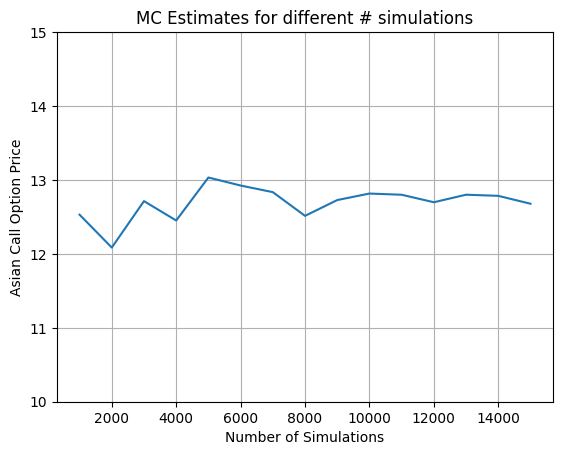

In [11]:
import matplotlib.pyplot as plt

plt.plot(M, asian_price)
plt.ylim([10, 15])
plt.title("MC Estimates for different # simulations")
plt.xlabel("Number of Simulations")
plt.ylabel("Asian Call Option Price")
plt.grid(True)
plt.show()